# **Forecast NVIDIA Corporation open price**

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Move the uploaded file to the appropriate directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [ ]:
!kaggle datasets download -d andrewmvd/sp-500-stocks

# https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks?select=sp500_stocks.csv

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks
License(s): CC0-1.0
 88% 38.0M/43.4M [00:00<00:00, 114MB/s]
100% 43.4M/43.4M [00:00<00:00, 112MB/s]


In [ ]:
!unzip /content/sp-500-stocks.zip

Archive:  /content/sp-500-stocks.zip
  inflating: sp500_companies.csv     
  inflating: sp500_index.csv         
  inflating: sp500_stocks.csv        


         Date Symbol  Adj Close      Close       High        Low       Open  \
0  2010-01-04    MMM  40.553383  69.414719  69.774246  69.122070  69.473244   
1  2010-01-05    MMM  40.299385  68.979935  69.590302  68.311035  69.230766   
2  2010-01-06    MMM  40.870907  69.958191  70.735786  69.824417  70.133781   
3  2010-01-07    MMM  40.900208  70.008362  70.033447  68.662209  69.665550   
4  2010-01-08    MMM  41.188396  70.501671  70.501671  69.648827  69.974915   

      Volume  
0  3640265.0  
1  3405012.0  
2  6301126.0  
3  5346240.0  
4  4073337.0  


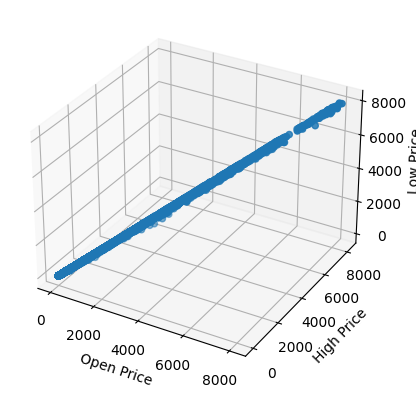

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv('/content/sp500_stocks.csv')

# Display the first few rows of the dataset
print(df.head())

# Visualize the data in 3 dimensions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Open'], df['High'], df['Low'])
ax.set_xlabel('Open Price')
ax.set_ylabel('High Price')
ax.set_zlabel('Low Price')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822369 entries, 0 to 1822368
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date       datetime64[ns]
 1   Symbol     object        
 2   Adj Close  float64       
 3   Close      float64       
 4   High       float64       
 5   Low        float64       
 6   Open       float64       
 7   Volume     float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 111.2+ MB


In [ ]:
df.describe()

,Date,Adj Close,Close,High,Low,Open,Volume
count,1822369,1.733589e+06,1.733589e+06,1.733589e+06,1.733589e+06,1.733589e+06,1.733589e+06
mean,2017-03-14 06:51:22.307480832,9.665707e+01,1.043479e+02,1.054924e+02,1.031465e+02,1.043284e+02,5.896125e+06
min,2010-01-04 00:00:00,7.000000e-01,7.000000e-01,7.100000e-01,6.500000e-01,7.000000e-01,0.000000e+00
25%,2013-08-08 00:00:00,2.910075e+01,3.519000e+01,3.558764e+01,3.479000e+01,3.519000e+01,9.880000e+05
50%,2017-03-15 00:00:00,5.332621e+01,6.229000e+01,6.292000e+01,6.162000e+01,6.227000e+01,2.141800e+06
75%,2020-10-19 00:00:00,1.019806e+02,1.124078e+02,1.135700e+02,1.111900e+02,1.123900e+02,4.888400e+06
max,2024-05-24 00:00:00,8.099960e+03,8.099960e+03,8.211400e+03,8.010000e+03,8.097980e+03,1.880998e+09
std,NaN,2.031608e+02,2.032893e+02,2.056709e+02,2.008484e+02,2.032308e+02,1.976984e+07


In [ ]:
# Feature engineering
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for NVDA
nvda_df = df[df['Symbol'] == 'NVDA']

# Create additional features (e.g., moving averages, lag features)
nvda_df['MA_5'] = nvda_df['Open'].rolling(window=5).mean()
nvda_df['MA_10'] = nvda_df['Open'].rolling(window=10).mean()
nvda_df['Lag_1'] = nvda_df['Open'].shift(1)
nvda_df['Lag_2'] = nvda_df['Open'].shift(2)
nvda_df = nvda_df.dropna()

# Split data into features and target
features = nvda_df[['MA_5', 'MA_10', 'Lag_1', 'Lag_2']]
target = nvda_df['Open']

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


<ipython-input-7-fb0635d0231a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvda_df['MA_5'] = nvda_df['Open'].rolling(window=5).mean()
<ipython-input-7-fb0635d0231a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvda_df['MA_10'] = nvda_df['Open'].rolling(window=10).mean()
<ipython-input-7-fb0635d0231a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, Flatten, Dropout, Add, Attention, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def build_attention_cnn(input_shape):
    inputs = Input(shape=input_shape)

    # First CNN Block
    x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(inputs)
    x = LayerNormalization()(x)

    # Second CNN Block
    x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = LayerNormalization()(x)

    # Third CNN Block
    x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = LayerNormalization()(x)

    # Attention Layer
    attention_output = Attention()([x, x])
    x = Add()([x, attention_output])
    x = LayerNormalization()(x)

    # Fourth CNN Block
    x = Conv1D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = LayerNormalization()(x)

    # Fifth CNN Block
    x = Conv1D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = LayerNormalization()(x)

    # Sixth CNN Block
    x = Conv1D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = LayerNormalization()(x)

    # Seventh CNN Block
    x = Conv1D(256, kernel_size=3, padding='same', activation='relu')(x)
    x = LayerNormalization()(x)

    # Eighth CNN Block
    x = Conv1D(256, kernel_size=3, padding='same', activation='relu')(x)
    x = LayerNormalization()(x)

    # Ninth CNN Block
    x = Conv1D(256, kernel_size=3, padding='same', activation='relu')(x)
    x = LayerNormalization()(x)

    # Output Layer
    x = Flatten()(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)
    return model

# Reshape data for CNN
X_train_cnn = X_train.values.reshape(-1, X_train.shape[1], 1)
X_test_cnn = X_test.values.reshape(-1, X_test.shape[1], 1)

# Build and compile the model
model = build_attention_cnn((X_train_cnn.shape[1], 1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)



In [ ]:
# Train the model with early stopping
history = model.fit(X_train_cnn, y_train, epochs=250, batch_size=32, validation_data=(X_test_cnn, y_test), callbacks=[early_stopping])


Epoch 1/250
91/91 [==============================] - 7s 18ms/step - loss: 26200.8945 - mae: 92.3910 - val_loss: 28515.2168 - val_mae: 111.2901
Epoch 2/250
91/91 [==============================] - 1s 13ms/step - loss: 25229.4551 - mae: 101.4128 - val_loss: 28136.4062 - val_mae: 106.1822
Epoch 3/250
91/91 [==============================] - 1s 14ms/step - loss: 25097.1484 - mae: 102.1029 - val_loss: 28511.7148 - val_mae: 111.3771
Epoch 4/250
91/91 [==============================] - 1s 13ms/step - loss: 25403.4609 - mae: 105.6155 - val_loss: 28525.5215 - val_mae: 109.0280
Epoch 5/250
91/91 [==============================] - 1s 13ms/step - loss: 25261.2734 - mae: 103.8967 - val_loss: 26240.9082 - val_mae: 100.0578
Epoch 6/250
91/91 [==============================] - 1s 12ms/step - loss: 24672.1250 - mae: 93.4609 - val_loss: 28310.0391 - val_mae: 108.1788
Epoch 7/250
91/91 [==============================] - 1s 13ms/step - loss: 21151.0527 - mae: 84.3055 - val_loss: 21208.0176 - val_mae: 72.5

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test data
y_pred = model.predict(X_test_cnn)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')


23/23 [==============================] - 1s 5ms/step
Mean Squared Error: 115.12778846370601
Mean Absolute Error: 4.133841799502551
R^2 Score: 0.9959625757487527


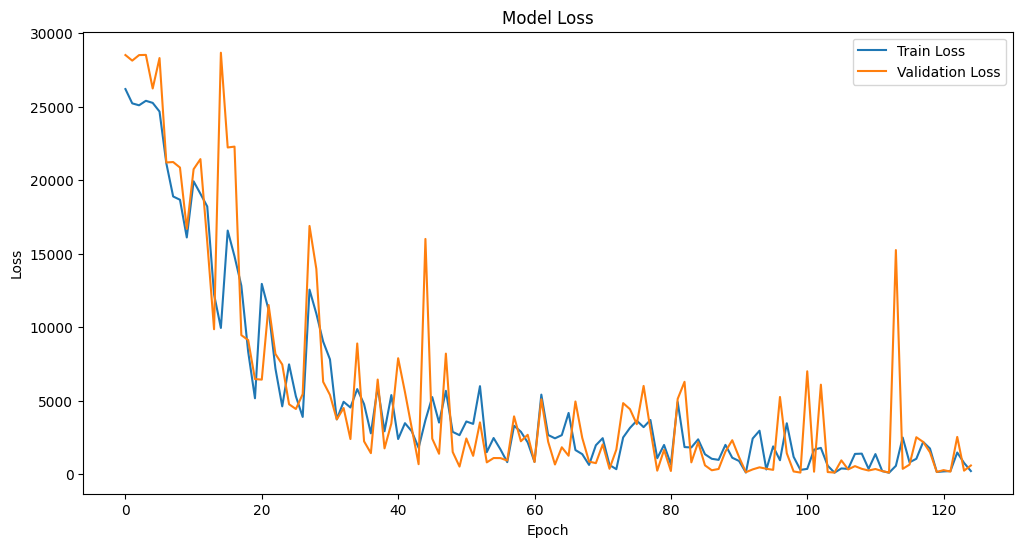

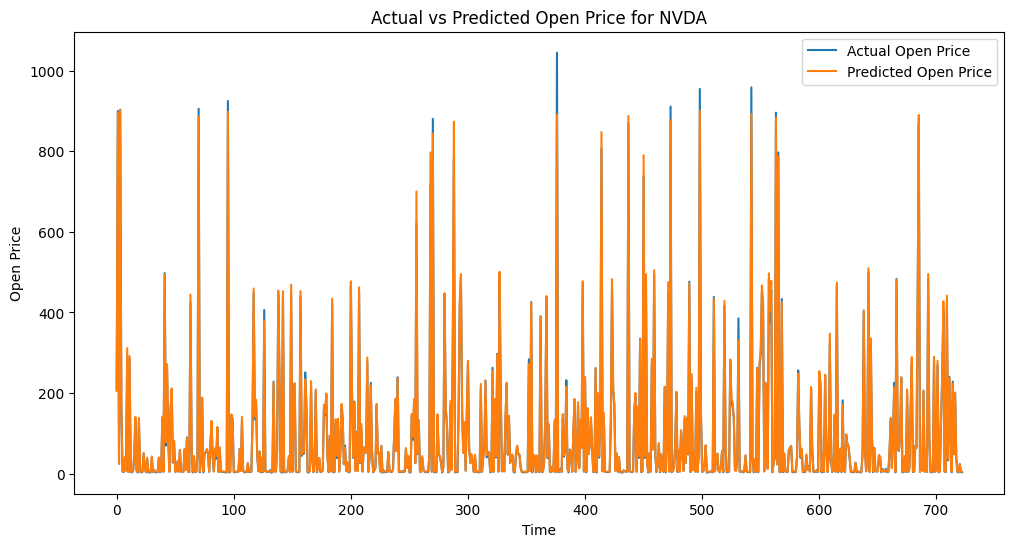

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Open Price')
plt.plot(y_pred, label='Predicted Open Price')
plt.title('Actual vs Predicted Open Price for NVDA')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend(loc='upper right')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Load the dataset
df = pd.read_csv('/content/sp500_stocks.csv')

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for NVDA
nvda_df = df[df['Symbol'] == 'NVDA'].sort_values('Date')

# Generate moving averages and lag features for prediction date
def generate_features(data, prediction_date, window1=5, window2=10):
    data = data.copy()
    data['MA_5'] = data['Open'].rolling(window=window1).mean()
    data['MA_10'] = data['Open'].rolling(window=window2).mean()
    data['Lag_1'] = data['Open'].shift(1)
    data['Lag_2'] = data['Open'].shift(2)

    # Get the last available data before the prediction date
    last_data = data[data['Date'] < prediction_date].iloc[-1]

    # Create a new row for the prediction date
    new_row = {
        'Date': prediction_date,
        'MA_5': last_data['MA_5'],
        'MA_10': last_data['MA_10'],
        'Lag_1': last_data['Open'],
        'Lag_2': last_data['Lag_1']
    }

    return pd.DataFrame([new_row])

# Define the prediction date
prediction_date = datetime(2024, 5, 26)

# Generate features for the prediction date
prediction_features = generate_features(nvda_df, prediction_date)

# Reshape data for CNN
prediction_features_cnn = prediction_features[['MA_5', 'MA_10', 'Lag_1', 'Lag_2']].values.reshape(-1, 4, 1)

# Make the forecast
predicted_open_price = model.predict(prediction_features_cnn)

print(f"Forecasted Open Price for NVDA on {prediction_date.strftime('%Y-%m-%d')}: {predicted_open_price[0][0]}")


1/1 [==============================] - 0s 203ms/step
Forecasted Open Price for NVDA on 2024-05-26: 881.3777465820312


Thank You